In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
from plotnine import *
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/workspaces/IDS701_Final_Project_Du/00_Source_Date/IDS701_final_data.csv')
df = df.drop(df.columns[[0, 1]], axis=1)
df['treatment'] = df['YEAR'].apply(lambda x: "Treated" if x > 2020 else "Control")
df["years_from_policy_change"] = df["YEAR"] - 2019
#df = df[['YEAR', 'treatment', 'years_from_policy_change', "Subject"] + list(df.columns[df.columns.str.contains('MEAN')])]
df.head()

,ENTITY_CD,YEAR,Subject_x,ASSESSMENT_NAME,ENTITY_NAME,SUBGROUP_NAME,NOT_TESTED,NUM_TESTED,NUM_PROF,PER_PROF,...,NUM_TESTED_english_language_learners,NUM_PROF_english_language_learners,TOTAL_SCALE_SCORES_english_language_learners,MEAN_SCORE_english_language_learners,NUM_TESTED_non-english_language_learners,NUM_PROF_non-english_language_learners,TOTAL_SCALE_SCORES_non-english_language_learners,MEAN_SCORE_non-english_language_learners,treatment,years_from_policy_change
0,1,2018,ELA,ELA5,NYC Public Schools,All Students,8982,68439,25990.0,38.0,...,8330.0,262.0,4828302.0,580.0,60109.0,25728.0,36282020.0,604.0,Control,-1
1,1,2018,ELA,ELA5,NYC Public Schools,All Students,8982,68439,25990.0,38.0,...,8330.0,262.0,4828302.0,580.0,60109.0,25728.0,36282020.0,604.0,Control,-1
2,1,2018,ELA,ELA5,NYC Public Schools,All Students,8982,68439,25990.0,38.0,...,8330.0,262.0,4828302.0,580.0,60109.0,25728.0,36282020.0,604.0,Control,-1
3,1,2018,ELA,ELA5,NYC Public Schools,All Students,8982,68439,25990.0,38.0,...,8330.0,262.0,4828302.0,580.0,60109.0,25728.0,36282020.0,604.0,Control,-1
4,1,2018,ELA,ELA5,NYC Public Schools,All Students,8982,68439,25990.0,38.0,...,8330.0,262.0,4828302.0,580.0,60109.0,25728.0,36282020.0,604.0,Control,-1


In [3]:
# df.columns

In [4]:
columns_f = ['ENTITY_CD', 'YEAR', 'ASSESSMENT_NAME', 'ENTITY_NAME', 'SUBGROUP_NAME',
       'MEAN_SCORE', 'ES', 'MS', 'EM', 'ST_NOTSURE', 
       'Male_MEAN_SCORE', 'MEAN_SCORE_white', 'MEAN_SCORE_non_white',
       'Subject', 'MEAN_SCORE_english_language_learners',
       'MEAN_SCORE_non-english_language_learners', 'Female_MEAN_SCORE', 'Male_MEAN_SCORE']

df_f = df[columns_f]

# add new column Gender which is 1

df_f["Gender"] = 1

# df_f = df_f.rename(columns={'Female_MEAN_SCORE': 'Gender_MEAN_SCORE'})
df_f['Gender_MEAN_SCORE'] = df_f['Female_MEAN_SCORE']


columns_m = ['ENTITY_CD', 'YEAR', 'ASSESSMENT_NAME', 'ENTITY_NAME', 'SUBGROUP_NAME',
       'MEAN_SCORE', 'ES', 'MS', 'EM', 'ST_NOTSURE', 
       'Male_MEAN_SCORE', 'MEAN_SCORE_white', 'MEAN_SCORE_non_white',
       'Subject', 'MEAN_SCORE_english_language_learners',
       'MEAN_SCORE_non-english_language_learners', 'Female_MEAN_SCORE', 'Male_MEAN_SCORE']

df_m = df[columns_m]

# add new column Gender which is 1

df_m["Gender"] = 0

# rename Female_MEAN_SCORE as Gender_MEAN_SCORE
df_m['Gender_MEAN_SCORE'] = df['Male_MEAN_SCORE']

# df_m = df_m.rename(columns={'Male_MEAN_SCORE': 'Gender_MEAN_SCORE'})

final_df = pd.concat([df_f, df_m])
final_df['Subject'] = final_df['Subject'].replace({'Math': 'MATH', 'Science': 'SCIENCE'})
# final_df.columns
final_df.shape

(18976322, 20)

In [5]:
final_df['Subject'].unique()

array(['ELA', 'MATH', 'SCIENCE'], dtype=object)

In [6]:
df_new =  final_df.sample(n=100000, random_state=42)
df_new['treatment'] = df_new['YEAR'].apply(lambda x: "Treated" if x > 2020 else "Control")

In [61]:
ela = df_new[df_new['Subject'] == 'ELA']
math = df_new[df_new['Subject'] == 'MATH']
science = df_new[df_new['Subject'] == 'SCIENCE']
# ela.columns

In [8]:
grouped = ela.groupby(['YEAR', 'Gender'])['Gender_MEAN_SCORE'].mean().unstack()
grouped

Gender,0,1
YEAR,,
2018,593.941120,600.243949
2019,593.509818,599.284701
2021,598.487086,602.501684
2022,595.211048,600.793735


In [13]:
ela.groupby(['ASSESSMENT_NAME','YEAR', 'Gender'])['Gender_MEAN_SCORE'].mean()

ASSESSMENT_NAME  YEAR  Gender
ELA3             2018  0         595.385064
                       1         600.163242
                 2019  0         595.021299
                       1         598.799550
                 2021  0         598.589823
                       1         600.274227
                 2022  0         593.832569
                       1         597.882558
ELA4             2018  0         594.344676
                       1         599.687719
                 2019  0         594.219027
                       1         598.859391
                 2021  0         600.716734
                       1         603.493890
                 2022  0         591.578143
                       1         596.219540
ELA5             2018  0         595.092593
                       1         599.883220
                 2019  0         593.447454
                       1         599.775000
                 2021  0         599.002288
                       1         603.005495
  

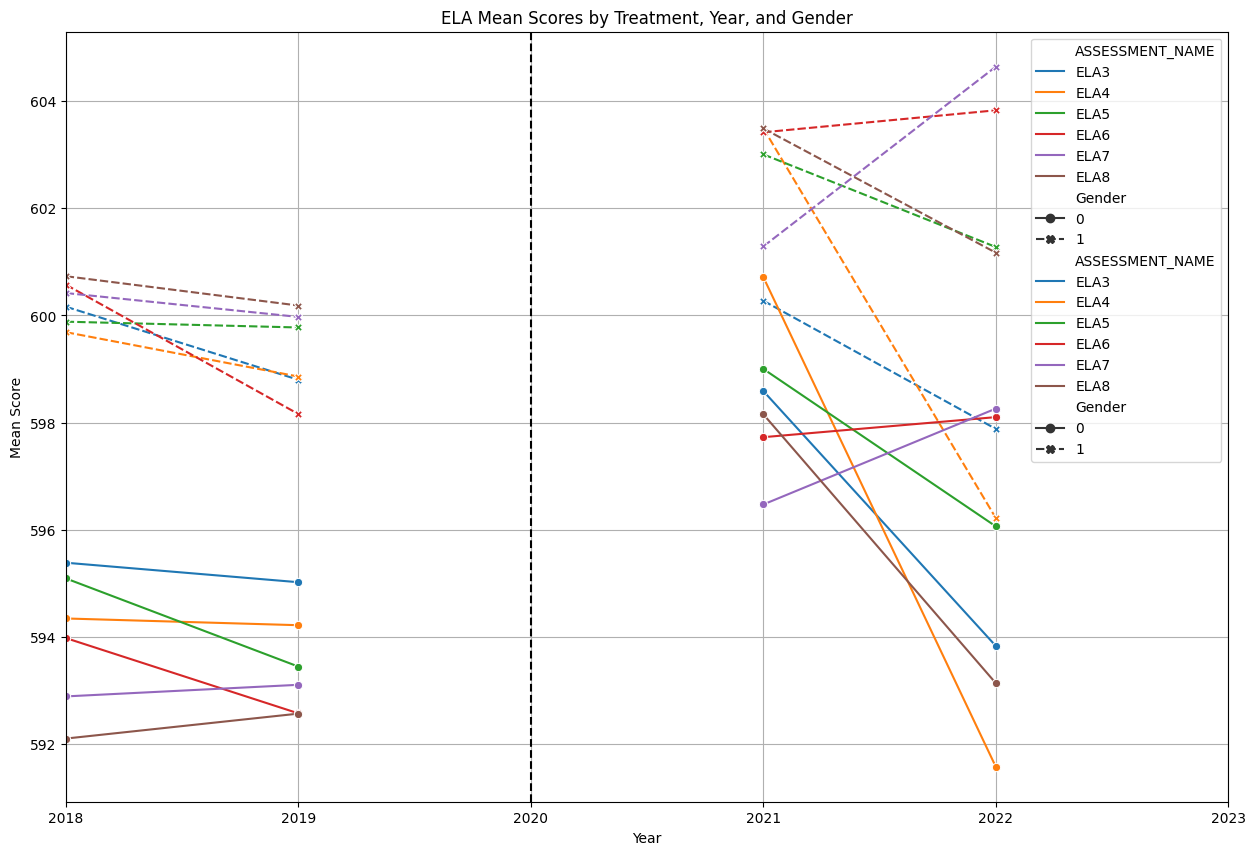

In [50]:
import pandas as pd

data = {'ELA3': {2018: {0: 595.385064, 1: 600.163242},
                 2019: {0: 595.021299, 1: 598.799550},
                 2021: {0: 598.589823, 1: 600.274227},
                 2022: {0: 593.832569, 1: 597.882558}},
        'ELA4': {2018: {0: 594.344676, 1: 599.687719},
                 2019: {0: 594.219027, 1: 598.859391},
                 2021: {0: 600.716734, 1: 603.493890},
                 2022: {0: 591.578143, 1: 596.219540}},
        'ELA5': {2018: {0: 595.092593, 1: 599.883220},
                 2019: {0: 593.447454, 1: 599.775000},
                 2021: {0: 599.002288, 1: 603.005495},
                 2022: {0: 596.063625, 1: 601.277019}},
        'ELA6': {2018: {0: 593.979358, 1: 600.574140},
                 2019: {0: 592.574516, 1: 598.160633},
                 2021: {0: 597.727684, 1: 603.417314},
                 2022: {0: 598.101925, 1: 603.827543}},
        'ELA7': {2018: {0: 592.890135, 1: 600.417840},
                 2019: {0: 593.106651, 1: 599.971953},
                 2021: {0: 596.471572, 1: 601.286682},
                 2022: {0: 598.260674, 1: 604.640788}},
        'ELA8': {2018: {0: 592.103487, 1: 600.731626},
                 2019: {0: 592.568672, 1: 600.184332},
                 2021: {0: 598.155660, 1: 603.488911},
                 2022: {0: 593.137931, 1: 601.170872}}}


df = pd.DataFrame.from_dict({(assess_name, year, gender): score 
                             for assess_name, years in data.items() 
                             for year, gender_scores in years.items()
                             for gender, score in gender_scores.items()},
                            orient='index',
                            columns=['Gender_MEAN_SCORE'])
df.index = pd.MultiIndex.from_tuples(df.index, names=['ASSESSMENT_NAME', 'YEAR', 'Gender'])
df.reset_index(inplace=True)

df['YEAR'] = df['YEAR'].astype(int)

fig, ax = plt.subplots()
# make it a bit bigger
fig.set_size_inches(15, 10)

# Plot the data points
first_half = df[df['YEAR'].isin([2018, 2019])]
second_half = df[df['YEAR'].isin([2021, 2022])]
sns.lineplot(data=first_half, x='YEAR', y='Gender_MEAN_SCORE', hue='ASSESSMENT_NAME', style='Gender', markers=True, ax=ax)
sns.lineplot(data=second_half, x='YEAR', y='Gender_MEAN_SCORE', hue='ASSESSMENT_NAME', style='Gender', markers=True, ax=ax)

# connect the data points only from 2018-2019 and 2021-2022


# add a vertical line on 2020
ax.axvline(x=2020, color='black', linestyle='--')

# set the x-axis limits
ax.set_xlim(2018, 2023,1)

ax.set_xticks([2018, 2019, 2020, 2021, 2022, 2023])



# Add a trend line for each gender
# grid = sns.lmplot(data=df, x='YEAR', y='Gender_MEAN_SCORE', hue='Gender', col='Gender', ci=True, scatter=False)
# grid.axes[0, 0].set_ylim(575, 610)
# grid.axes[0, 1].set_ylim(575, 610)
# grid.axes[0, 0].axvline(x=2020, color='black', linestyle='--')

# Add axis labels, title, and legend
ax.set_xlabel('Year')
ax.set_ylabel('Mean Score')
ax.grid(True)
ax.set_title('ELA Mean Scores by Treatment, Year, and Gender')
ax.legend()
plt.show()



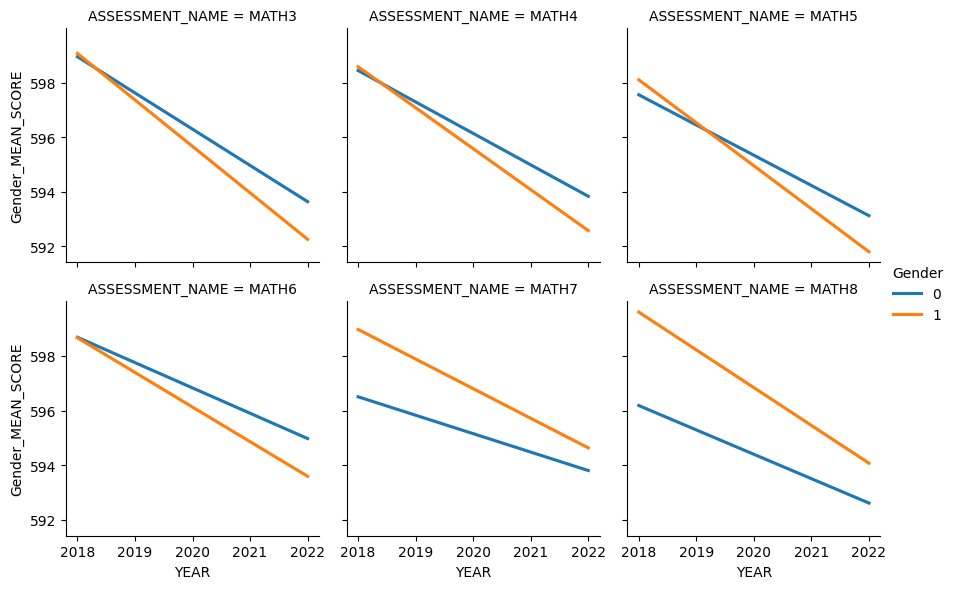

In [37]:
# Plot the data points
sns.scatterplot(data=df, x='YEAR', y='Gender_MEAN_SCORE', hue='ASSESSMENT_NAME', style='Gender', markers=True, ax=ax)

# add a vertical line on 2020
ax.axvline(x=2020, color='black', linestyle='--')

# Add a trend line for each gender
trend_data = df.groupby(['ASSESSMENT_NAME', 'Gender', 'YEAR'])['Gender_MEAN_SCORE'].mean().reset_index()
sns.lmplot(data=trend_data, x='YEAR', y='Gender_MEAN_SCORE', hue='Gender', col='ASSESSMENT_NAME', col_wrap=3, ci=None, scatter=False, height=3, aspect=1)

# Add axis labels, title, and legend
ax.set_xlabel('Year')
ax.set_ylabel('Mean Score')
ax.grid(True)
ax.set_title('Math Mean Scores by Assessment, Year, and Gender')
ax.legend()
plt.show()


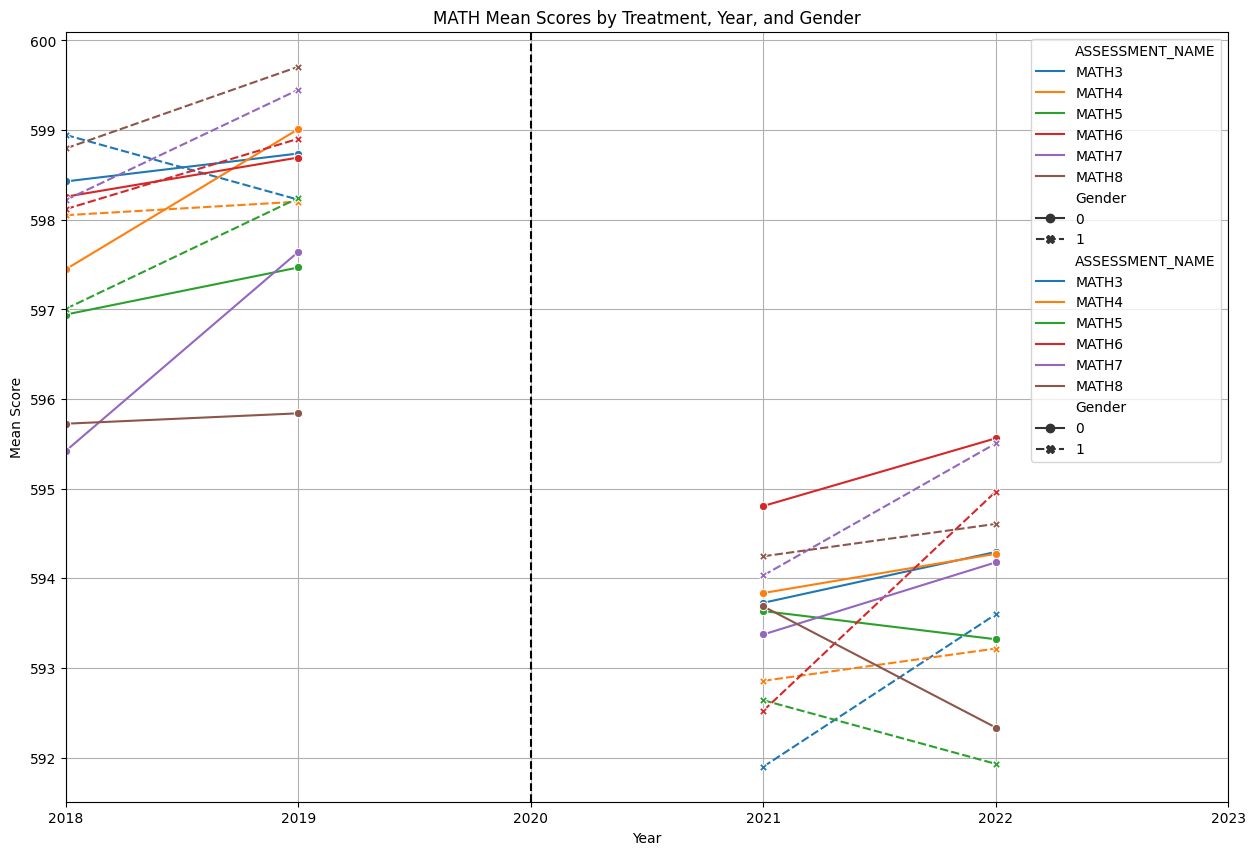

In [53]:
df = math.groupby(['ASSESSMENT_NAME', 'YEAR', 'Gender'])['Gender_MEAN_SCORE'].mean().reset_index()

df['YEAR'] = df['YEAR'].astype(int)

fig, ax = plt.subplots()
# make it a bit bigger
fig.set_size_inches(15, 10)

# Plot the data points
first_half = df[df['YEAR'].isin([2018, 2019])]
second_half = df[df['YEAR'].isin([2021, 2022])]
sns.lineplot(data=first_half, x='YEAR', y='Gender_MEAN_SCORE', hue='ASSESSMENT_NAME', style='Gender', markers=True, ax=ax)
sns.lineplot(data=second_half, x='YEAR', y='Gender_MEAN_SCORE', hue='ASSESSMENT_NAME', style='Gender', markers=True, ax=ax)

# connect the data points only from 2018-2019 and 2021-2022


# add a vertical line on 2020
ax.axvline(x=2020, color='black', linestyle='--')

# set the x-axis limits
ax.set_xlim(2018, 2023,1)

ax.set_xticks([2018, 2019, 2020, 2021, 2022, 2023])



# Add a trend line for each gender
# grid = sns.lmplot(data=df, x='YEAR', y='Gender_MEAN_SCORE', hue='Gender', col='Gender', ci=True, scatter=False)
# grid.axes[0, 0].set_ylim(575, 610)
# grid.axes[0, 1].set_ylim(575, 610)
# grid.axes[0, 0].axvline(x=2020, color='black', linestyle='--')

# Add axis labels, title, and legend
ax.set_xlabel('Year')
ax.set_ylabel('Mean Score')
ax.grid(True)
ax.set_title('MATH Mean Scores by Treatment, Year, and Gender')
ax.legend()
plt.show()

In [62]:
science = science[science['ASSESSMENT_NAME'].isin(['Science8', 'Science4'])]

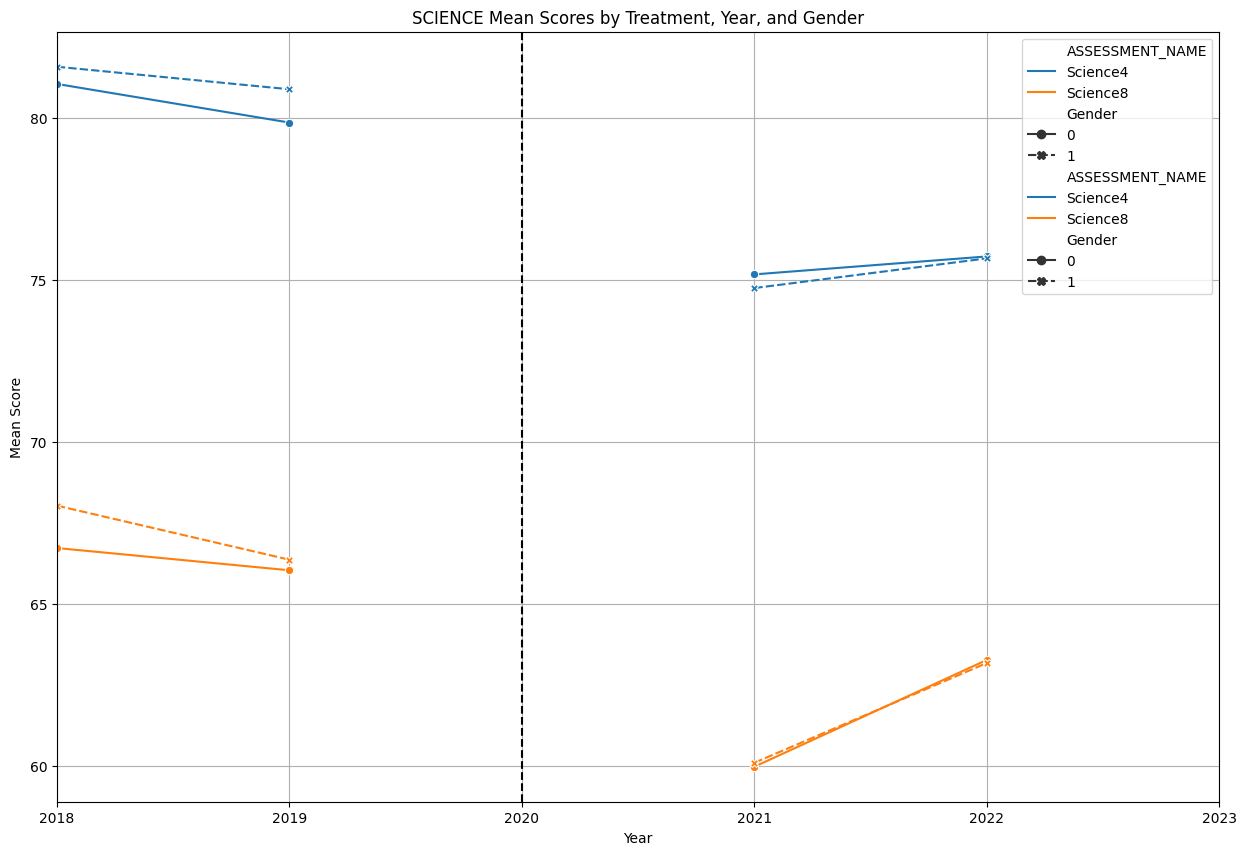

In [63]:
df = science.groupby(['ASSESSMENT_NAME', 'YEAR', 'Gender'])['Gender_MEAN_SCORE'].mean().reset_index()

df['YEAR'] = df['YEAR'].astype(int)

fig, ax = plt.subplots()
# make it a bit bigger
fig.set_size_inches(15, 10)

# Plot the data points
first_half = df[df['YEAR'].isin([2018, 2019])]
second_half = df[df['YEAR'].isin([2021, 2022])]
sns.lineplot(data=first_half, x='YEAR', y='Gender_MEAN_SCORE', hue='ASSESSMENT_NAME', style='Gender', markers=True, ax=ax)
sns.lineplot(data=second_half, x='YEAR', y='Gender_MEAN_SCORE', hue='ASSESSMENT_NAME', style='Gender', markers=True, ax=ax)

# connect the data points only from 2018-2019 and 2021-2022


# add a vertical line on 2020
ax.axvline(x=2020, color='black', linestyle='--')

# set the x-axis limits
ax.set_xlim(2018, 2023,1)

ax.set_xticks([2018, 2019, 2020, 2021, 2022, 2023])

ax.set_xlabel('Year')
ax.set_ylabel('Mean Score')
ax.grid(True)
ax.set_title('SCIENCE Mean Scores by Treatment, Year, and Gender')
ax.legend()
plt.show()

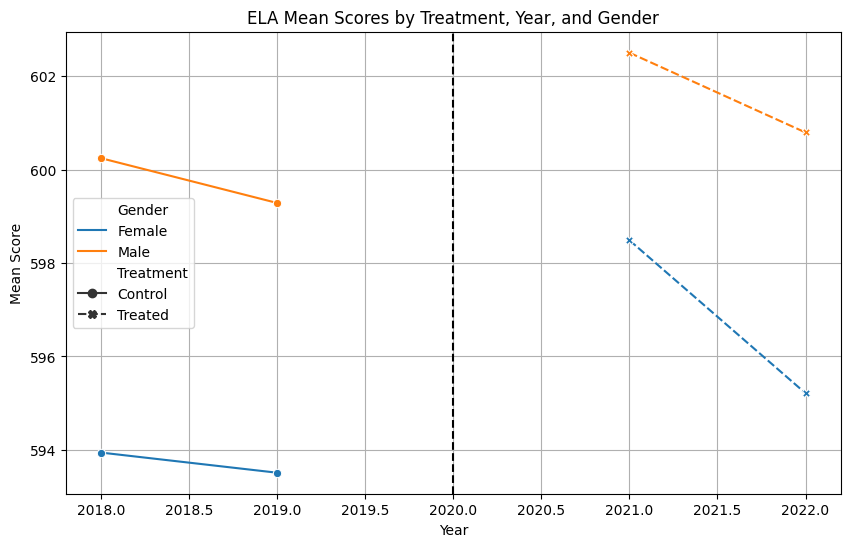

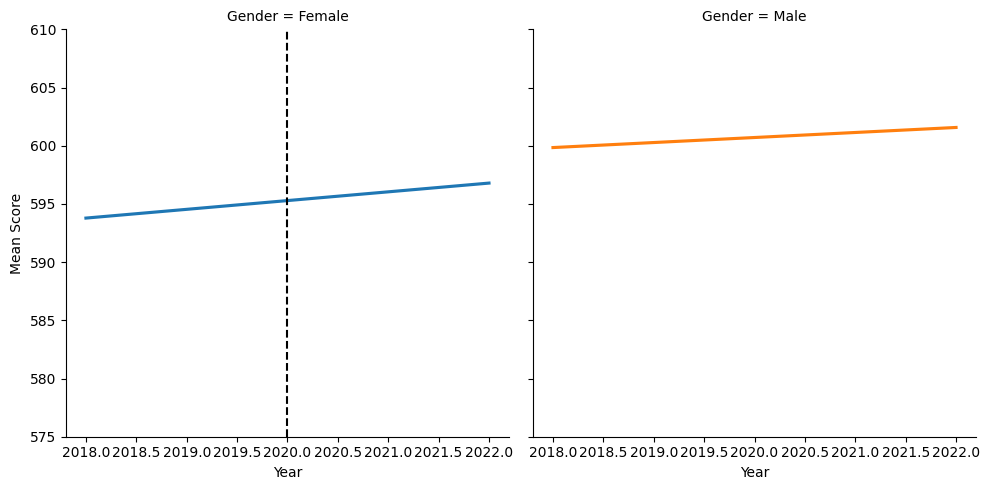

In [9]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Define the data as a dictionary
data = {
    ('Control', 2018): {'Female': 593.941120, 'Male': 600.243949},
    ('Control', 2019): {'Female': 593.509818, 'Male': 599.284701},
    ('Treated', 2021): {'Female': 598.487086, 'Male': 602.501684},
    ('Treated', 2022): {'Female': 595.211048, 'Male': 600.793735}
}

# Convert the data to a pandas DataFrame
df = pd.DataFrame.from_dict({(treatment, year, gender): score
                             for (treatment, year), scores in data.items()
                             for gender, score in scores.items()},
                            orient='index',
                            columns=['Mean Score'])
df.index = pd.MultiIndex.from_tuples(df.index, names=['Treatment', 'Year', 'Gender'])
df.reset_index(inplace=True)
df['Year'] = df['Year'].astype(int)

# Set up the plot
fig, ax = plt.subplots()
# make it a bit bigger
fig.set_size_inches(10, 6)

# Plot the data points
sns.lineplot(data=df, x='Year', y='Mean Score', hue='Gender', style='Treatment', markers=True, ax=ax)

# add a vertical line on 2020
ax.axvline(x=2020, color='black', linestyle='--')

# Add a trend line for each gender
grid = sns.lmplot(data=df, x='Year', y='Mean Score', hue='Gender', col='Gender', ci=None, scatter=False)
grid.axes[0, 0].set_ylim(575, 610)
grid.axes[0, 1].set_ylim(575, 610)
grid.axes[0, 0].axvline(x=2020, color='black', linestyle='--')

# Add axis labels, title, and legend
ax.set_xlabel('Year')
ax.set_ylabel('Mean Score')
ax.grid(True)
ax.set_title('ELA Mean Scores by Treatment, Year, and Gender')
ax.legend()
plt.show()


In [10]:
math['YEAR'].unique()
df_new[df_new['Subject'] == 'MATH']['YEAR'].unique()
# df.columns
# df[df['Subject'] == 'MATH']['YEAR']

array([2022, 2019, 2018, 2021])

In [11]:
grouped2 = math.groupby(['YEAR', 'Gender'])['Gender_MEAN_SCORE'].mean().unstack()
grouped2

Gender,0,1
YEAR,,
2018,597.023170,598.185975
2019,597.898701,598.789454
2021,593.836641,593.015643
2022,593.978239,593.977889


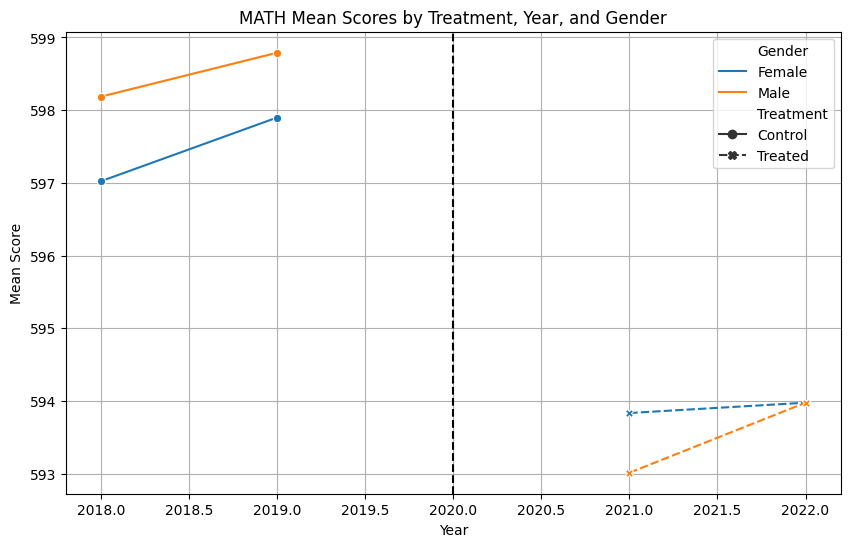

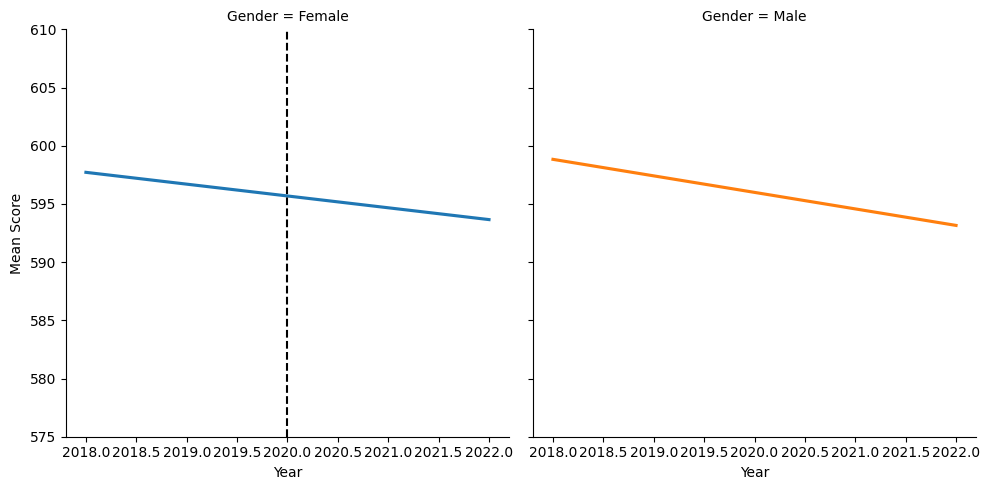

In [26]:
data = {
    ('Control', 2018): {'Female': 597.023170, 'Male': 598.185975},
    ('Control', 2019): {'Female': 597.898701, 'Male': 598.789454},
    ('Treated', 2021): {'Female': 593.836641, 'Male': 593.015643},
    ('Treated', 2022): {'Female': 593.978239, 'Male': 593.977889}
}

# Convert the data to a pandas DataFrame
df = pd.DataFrame.from_dict({(treatment, year, gender): score
                             for (treatment, year), scores in data.items()
                             for gender, score in scores.items()},
                            orient='index',
                            columns=['Mean Score'])
df.index = pd.MultiIndex.from_tuples(df.index, names=['Treatment', 'Year', 'Gender'])
df.reset_index(inplace=True)
df['Year'] = df['Year'].astype(int)

# Set up the plot
fig, ax = plt.subplots()
# make it a bit bigger
fig.set_size_inches(10, 6)

# Plot the data points
sns.lineplot(data=df, x='Year', y='Mean Score', hue='Gender', style='Treatment', markers=True, ax=ax)

# add a vertical line on 2020
ax.axvline(x=2020, color='black', linestyle='--')

# Add a trend line for each gender
grid = sns.lmplot(data=df, x='Year', y='Mean Score', hue='Gender', col='Gender', ci=None, scatter=False)
grid.axes[0, 0].set_ylim(575, 610)
grid.axes[0, 1].set_ylim(575, 610)
grid.axes[0, 0].axvline(x=2020, color='black', linestyle='--')

# Add axis labels, title, and legend
ax.grid(True)
ax.set_xlabel('Year')
ax.set_ylabel('Mean Score')
ax.set_title('MATH Mean Scores by Treatment, Year, and Gender')
ax.legend()
plt.show()


In [13]:
grouped3 = science.groupby(['YEAR', 'Gender'])['Gender_MEAN_SCORE'].mean().unstack()
grouped3

Gender,0,1
YEAR,,
2018,73.888371,74.787297
2019,72.903377,73.274556
2021,67.725836,67.911986
2022,69.402542,69.327037


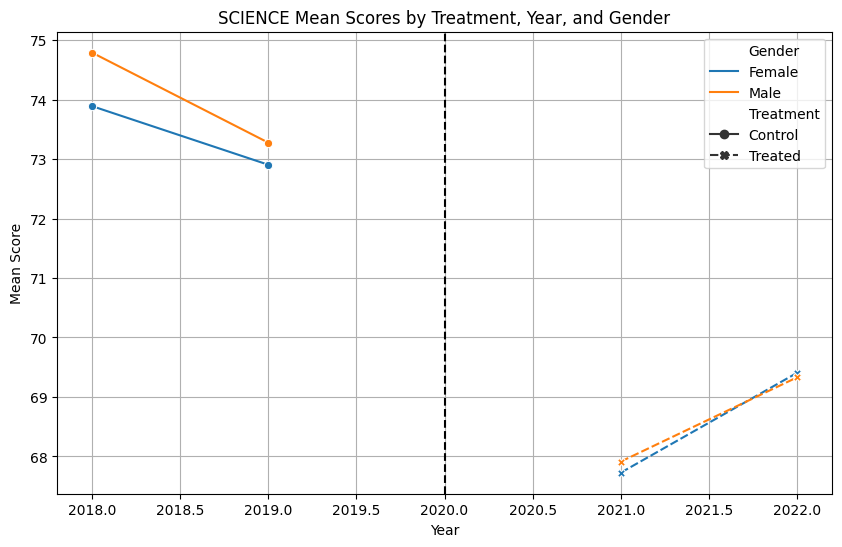

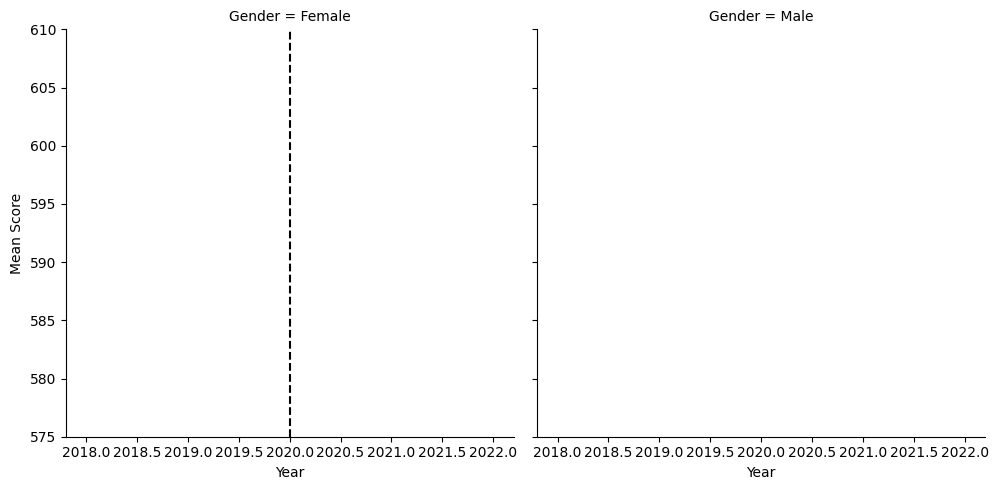

In [25]:
# Define the data as a dictionary
data = {
    ('Control', 2018): {'Female': 73.888371, 'Male': 74.787297},
    ('Control', 2019): {'Female': 72.903377, 'Male': 73.274556},
    ('Treated', 2021): {'Female': 67.725836, 'Male': 67.911986},
    ('Treated', 2022): {'Female': 69.402542, 'Male': 69.327037}
}

# Convert the data to a pandas DataFrame
df = pd.DataFrame.from_dict({(treatment, year, gender): score
                             for (treatment, year), scores in data.items()
                             for gender, score in scores.items()},
                            orient='index',
                            columns=['Mean Score'])
df.index = pd.MultiIndex.from_tuples(df.index, names=['Treatment', 'Year', 'Gender'])
df.reset_index(inplace=True)
df['Year'] = df['Year'].astype(int)


# Set up the plot
fig, ax = plt.subplots()
# make it a bit bigger
fig.set_size_inches(10, 6)

# Plot the data points
sns.lineplot(data=df, x='Year', y='Mean Score', hue='Gender', style='Treatment', markers=True, ax=ax)

# add a vertical line on 2020
ax.axvline(x=2020, color='black', linestyle='--')

# Add a trend line for each gender
grid = sns.lmplot(data=df, x='Year', y='Mean Score', hue='Gender', col='Gender', ci=None, scatter=False)
grid.axes[0, 0].set_ylim(575, 610)
grid.axes[0, 1].set_ylim(575, 610)
grid.axes[0, 0].axvline(x=2020, color='black', linestyle='--')

# Add axis labels, title, and legend
ax.set_xlabel('Year')
ax.grid(True)
ax.set_ylabel('Mean Score')
ax.set_title('SCIENCE Mean Scores by Treatment, Year, and Gender')
ax.legend()
plt.show()


In [15]:
# final_df['Subject'].unique()

In [16]:
# math.columns

In [17]:
# grouped = math.groupby(['YEAR', 'treatment'])['Gender_MEAN_SCORE'].mean().unstack()

# # Plot the mean scores for the control and treated groups
# plt.plot(grouped.index, grouped.values, label='Control')
# plt.xticks(np.arange(2018, 2023, 1))
# plt.yticks(np.arange(500, 650, 30))
# # plot a vertical line at the year 2020
# plt.axvline(x=2020, color='black', linestyle='--')
# plt.xlabel('Year')
# plt.ylabel('Mean Score')
# plt.title('Treatment vs Control Mean Scores for ELA')
# plt.legend()
# plt.show()

In [18]:
# grouped = science.groupby(['YEAR', 'treatment'])['Gender_MEAN_SCORE'].mean().unstack()

# # Plot the mean scores for the control and treated groups
# plt.plot(grouped.index, grouped.values, label='Control')
# plt.xticks(np.arange(2018, 2023, 1))
# plt.yticks(np.arange(0, 650, 30))
# # plot a vertical line at the year 2020
# plt.axvline(x=2020, color='black', linestyle='--')
# plt.xlabel('Year')
# plt.ylabel('Mean Score')
# plt.title('Treatment vs Control Mean Scores for ELA')
# plt.legend()
# plt.show()

In [19]:
# grouped = df_new.groupby(['YEAR', 'treatment'])['MEAN_SCORE'].mean().unstack()

# # Plot the mean scores for the control and treated groups
# plt.plot(grouped.index, grouped['Control'], label='Control')
# plt.plot(grouped.index, grouped['Treated'], label='Treated')
# plt.xticks(np.arange(2018, 2023, 1))
# plt.yticks(np.arange(450, 600, 30))
# # plot a vertical line at the year 2020
# plt.axvline(x=2020, color='black', linestyle='--')
# plt.xlabel('Year')
# plt.ylabel('Mean Score')
# plt.title('Treatment vs Control Mean Scores')
# plt.legend()
# plt.show()

In [20]:
# female_ela_mean = ela.groupby(['YEAR', "treatment"])['Female_MEAN_SCORE'].mean().unstack()
# male_ela_mean =  ela.groupby(['YEAR', "treatment"])['Male_MEAN_SCORE'].mean().unstack()